In [8]:
from lib2to3.pgen2.pgen import DFAState
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import cred
import pandas as pd 
import time
import numpy as np
import matplotlib.pyplot as plt
import math
import mpld3


In [10]:
scope = "user-read-recently-played"
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=cred.client_ID, client_secret= cred.client_SECRET, redirect_uri=cred.redirect_url, scope=scope))

ids = []
results = sp.current_user_recently_played()
for idx, item in enumerate(results['items']):
    track = item['track']
    print(idx, track['artists'][0]['name'], " – ", track['name'])
    ids.append(track['id'])



0 Aaron May  –  HIDDEN VOICES
1 Aaron May  –  HIDDEN VOICES
2 Sheff G  –  Moody
3 Sheff G  –  On Go (feat. Polo G)
4 Denzel Curry  –  Walkin - Key Glock remix
5 Denzel Curry  –  Walkin - Key Glock remix
6 Goldensuns  –  Easy Love
7 Teenage Priest  –  Anymore
8 Wallice  –  Dramamine
9 spill tab  –  Splinter
10 Bennett Coast  –  Seeds
11 Ritt Momney  –  Show Runner 99
12 Harry Styles  –  Little Freak
13 Tom The Mail Man  –  Bad Hoe
14 Future  –  WAIT FOR U (feat. Drake & Tems)
15 Vince Staples  –  AYE! (FREE THE HOMIES)
16 Steve Lacy  –  Static
17 Steve Lacy  –  Static
18 Public Library Commute  –  Across the Room
19 Public Library Commute  –  kauai
20 Omar Apollo  –  Want U Around (feat. Ruel)
21 Dreamer Boy  –  Orange Girl
22 Daniel Caesar  –  Please Do Not Lean (feat. BADBADNOTGOOD)
23 Del Water Gap  –  Perfume
24 Vansire  –  Vivienne
25 Skip Marley  –  Slow Down
26 Free Nationals  –  Shibuya (feat. Syd)
27 Free Nationals  –  Time
28 Rex Orange County  –  7AM
29 Public Library Commute

In [12]:
print(ids)

['1oMKYS43XRqNsY1SVuiCoJ', '4BwGU8l91SQWeVqnWqWClh', '1Vrw7LZl56M8akId20D455', '3i058E8uxTsYqJ5NWZzqSj', '6OGvHDjNLuEJoBc8BEQWBP', '59nOXPmaKlBfGMDeOVGrIK', '7CvtBcThQ4piVKkfUXieig', '4OmfWzukSVD140NiAIEjem', '4OmfWzukSVD140NiAIEjem', '7dCSqTnarqs3EF7iDRVRW9', '1yWbRXtwrkVO4yrjp7ohgG', '1Qu24vc8msUVLcMZWa4k1x', '6iha68MS4jddL4TY5pZGRi', '5uXO1sjZ7VbNKexKaFRna3', '3wJAk2rKEEoYlXSLpLVrkU', '7sPJFcAr6I8VPjXgNrXgh1', '0jPEWByX9DZAQb5zyQ6eng', '6WVSnyKQGzs1fosa2I3FMQ', '7klPHv3HnXdUY3dSfTccNc', '32B72vNdAd1987euX9Lkgs', '53Kum5jxy3QWism3RUUQzU', '2vAFFYY2Iwhry8o8ZQgW5D', '2KZVQQfBRgAYkFqlr3GRqv', '66EeuV09dYF6KxfqzZ6tWt', '0DmkBOGgEWMbUJlL6VwwF2', '4qde41KNfJv2TyrKC1kug7', '33DzKnwuBE6lfOiADwzd5E', '5PE2TkQKrgcLZupVGe5Pxu', '54tuwZt2mi4kn46IeAz1FJ', '5FcK65jGaIPzdIUB9asktp', '2z2w98hk0TWjLTCLtACnwJ', '2zqCw4g4w9ZLzwHtw1I7e9', '24G1PXBWoRgV0wDXZKwxzz', '2KZVQQfBRgAYkFqlr3GRqv', '66EeuV09dYF6KxfqzZ6tWt', '32B72vNdAd1987euX9Lkgs', '2GDzymJClRxEhhDYGwQZz6', '0xta6Gah3inmeHbj0e3F9a', '3QFInJAm9e

In [11]:
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  # meta
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']

  track = [name, album, artist, release_date, length, popularity, danceability, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
  return track

In [12]:
# loop over track ids 
tracks = []
for i in range(len(ids)):
  time.sleep(.5)
  track = getTrackFeatures(ids[i])
  tracks.append(track)

# create dataset
df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])


In [182]:
df

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,HIDDEN VOICES,WOKEUPTHINKINBOUT / HIDDEN VOICES,Aaron May,2022-01-07,150909,56,0.754,0.77400,0.754,0.530,0.017600,0.1160,-10.846,0.0742,140.014,4
1,HIDDEN VOICES,WOKEUPTHINKINBOUT / HIDDEN VOICES,Aaron May,2022-01-07,150909,56,0.754,0.77400,0.754,0.530,0.017600,0.1160,-10.846,0.0742,140.014,4
2,Moody,One and Only,Sheff G,2020-05-15,102800,53,0.820,0.82100,0.820,0.446,0.000000,0.1040,-7.797,0.1470,131.070,4
3,On Go (feat. Polo G),On Go (feat. Polo G),Sheff G,2021-07-23,180805,65,0.880,0.45900,0.880,0.427,0.000001,0.1190,-6.004,0.3230,103.542,3
4,Walkin - Key Glock remix,Walkin (Key Glock remix),Denzel Curry,2022-06-01,226115,63,0.777,0.14000,0.777,0.703,0.000013,0.2350,-6.863,0.0485,135.985,4
5,Walkin - Key Glock remix,Walkin (Key Glock remix),Denzel Curry,2022-06-01,226115,63,0.777,0.14000,0.777,0.703,0.000013,0.2350,-6.863,0.0485,135.985,4
6,Easy Love,Easy Love,Goldensuns,2021-02-24,243126,44,0.584,0.04240,0.584,0.481,0.002320,0.0794,-6.707,0.0257,139.969,4
7,Anymore,Rhymes & Rhythms,Teenage Priest,2021-08-27,247957,37,0.665,0.44900,0.665,0.578,0.287000,0.0978,-7.548,0.0279,75.003,4
8,Dramamine,Off the Rails,Wallice,2021-06-04,175123,35,0.607,0.01560,0.607,0.751,0.002040,0.2330,-5.577,0.0338,124.169,4
9,Splinter,Splinter,spill tab,2022-05-20,148173,52,0.593,0.02200,0.593,0.543,0.000000,0.4790,-7.330,0.0336,97.987,4


In [13]:
df['popularity']= df['popularity'].astype('float64')
df['danceability']= df['danceability'].astype('float64')
df['acousticness']= df['acousticness'].astype('float64')
df['energy']= df['energy'].astype('float64')
df['instrumentalness']= df['instrumentalness'].astype('float64')
df['liveness']= df['liveness'].astype('float64')
df['time_signature'] = df['time_signature'].astype('float64')
df['length'] = df['length'].astype('float64')

In [14]:
df['popularity']= df['popularity'].mean(axis=0)
df['danceability']= df['danceability'].mean(axis=0)
df['acousticness']= df['acousticness'].mean(axis=0)
df['energy']= df['energy'].mean(axis=0)
df['instrumentalness']= df['instrumentalness'].mean(axis=0)
df['liveness']= df['liveness'].mean(axis=0)
df['time_signature']= df['time_signature'].mean(axis=0)
df['length']= df['length'].mean(axis=0)
df['loudness']= df['loudness'].mean(axis=0)
df['speechiness']= df['speechiness'].mean(axis=0)
df['tempo']= df['tempo'].mean(axis=0)
df['time_signature']= df['time_signature'].mean(axis=0)

In [15]:
df2= df.drop(['name','album','artist','release_date','length'],axis=1)

In [16]:
df2.drop_duplicates(inplace=True)

In [187]:
df2

,popularity,danceability,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,53.9,0.63972,0.377742,0.63972,0.5833,0.084434,0.175972,-7.8176,0.089128,117.89558,3.98


In [17]:
pop= df2['popularity']
acoutstic= df2['acousticness']
energy= df2['energy']
instru= df2['instrumentalness']
live= df2['liveness']
loud= df2['loudness']
speech= df2['speechiness']
tempo= df2['tempo']
timSig= df2['time_signature']

In [18]:
X= (pop/10)-(acoutstic)-(instru+energy)-(live)
X

0    4.168552
dtype: float64

In [19]:
Y= (tempo/-20)-(loud)+(speech)-(timSig)
Y

0   -1.968051
dtype: float64

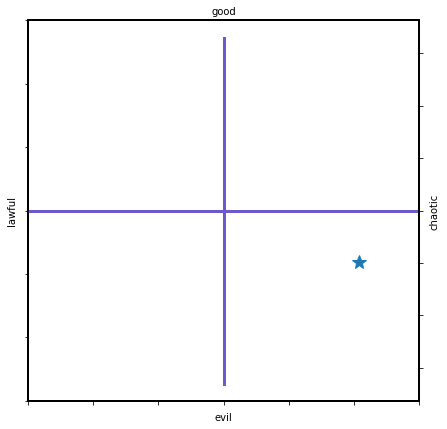

In [20]:
from turtle import color
from numpy import size


x = [-6,6]


fig= plt.figure(figsize=(7,7)) #Size of Graph

plt.xlim(x) # 1 X Range [-6,6]
plt.ylim(x) # 2 Y Range [-6,6]
axis = plt.gca() #3 Get Current Axis
axis2 = axis.twinx()
axis.axes.xaxis.set_ticklabels([])
axis.axes.yaxis.set_ticklabels([])
axis2.axes.xaxis.set_ticklabels([])
axis2.axes.yaxis.set_ticklabels([])
axis2.spines['right'].set_color('black')
axis2.spines['right'].set_linewidth(2)
axis.spines['top'].set_linewidth(2)
axis.spines['bottom'].set_linewidth(2)
axis.spines['left'].set_linewidth(2)
axis.spines['left'].set_visible(True)
axis.spines['right'].set_visible(True)
axis.spines['top'].set_visible(True)
axis.spines['bottom'].set_visible(True)

axis2.spines['left'].set_visible(True)
axis2.spines['right'].set_visible(True)
axis2.spines['top'].set_visible(True)
axis2.spines['bottom'].set_visible(True)


axis2.set_ylabel('chaotic')
plt.grid(False)
axis.set_ylabel('lawful', color='black')
axis.set_xlabel('evil', color='black')
plt.plot(axis.get_xlim(),[0,0],'slateblue',linewidth=3) #4 X Axis Plots Line Across
plt.plot([0,0],axis.get_ylim(),'slateblue',linewidth=3) #5 Y Axis Plots Line Across
plt.plot(axis2.get_xlim(),[0,0],'slateblue',linewidth=3) #4 X Axis Plots Line Across
plt.plot([0,0],axis2.get_ylim(),'slateblue',linewidth=3) #5 Y Axis Plots Line Across


plt.title("good", size= 'medium')





plt.plot(X, Y,'*',markersize=15)


plt.show()

In [21]:
html_str = mpld3.fig_to_html(fig)
Html_file= open("index2.html","w")
Html_file.write(html_str)
Html_file.close()

In [6]:
import mpld3